**Colab Link for the notebook** - https://colab.research.google.com/drive/16eqn6QtGsANlDvPwZ_jNrE6c_YmJ3wy4?usp=sharing

#Data Collection
Our dataset comprises of 2 parts one part is a **subset of Tensorflow's Speech command dataset** and the other part was **created by our team and some of our friends**. We have tried getting as much data we could get during the week and are training our model on the same.

**Source 1 -** https://drive.google.com/drive/folders/1m0qeN1g32a7GKmeWt11A0XeGnlGqvBBh?usp=sharing

**Source 2 -** https://www.kaggle.com/c/tensorflow-speech-recognition-challenge

Also we have priortized the words based on the need and eliminated quiet a decent part of vocab so that we could get atleast a 2 digit accuracy figure. 

However 1 digit accuracy would do too considering about a 100 classes and very less data, but please don't overfit.


In [ ]:
from google.colab import files

files.upload()

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#Downloading tensorflow speech command dataset
!kaggle competitions download -c tensorflow-speech-recognition-challenge

In [ ]:
!apt-get install p7zip-full

In [ ]:
#Unzipping the dataset
!p7zip -d /content/train.7z

In [ ]:
#Removing unneccessary files and folders
! rm -frv /content/train/audio/_background_noise_
! rm -frv /content/train/audio/bed
! rm -frv /content/train/audio/bird
! rm -frv /content/train/audio/cat
! rm -frv /content/train/audio/dog
! rm -frv /content/train/audio/go
! rm -frv /content/train/audio/happy
! rm -frv /content/train/audio/house
! rm -frv /content/train/audio/marvin
! rm -frv /content/train/audio/no
! rm -frv /content/train/audio/sheila
! rm -frv /content/train/audio/stop
! rm -frv /content/train/audio/tree
! rm -frv /content/train/audio/wow
! rm -frv /content/train/audio/yes

In [ ]:
#Getting 2nd part of dataset from drive
!cp -r /content/drive/MyDrive/records /content/train/audio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!mv /content/train/audio/down/* /content/train/audio/records/down

In [ ]:
!mv /content/train/audio/zero/* /content/train/audio/records/0

In [ ]:
!mv /content/train/audio/one/* /content/train/audio/records/1
!mv /content/train/audio/two/* /content/train/audio/records/2
!mv /content/train/audio/three/* /content/train/audio/records/3
!mv /content/train/audio/four/* /content/train/audio/records/4
!mv /content/train/audio/five/* /content/train/audio/records/5
!mv /content/train/audio/six/* /content/train/audio/records/6
!mv /content/train/audio/seven/* /content/train/audio/records/7
!mv /content/train/audio/eight/* /content/train/audio/records/8
!mv /content/train/audio/nine/* /content/train/audio/records/9
!mv /content/train/audio/on /content/train/audio/records
!mv /content/train/audio/off /content/train/audio/records
!mv /content/train/audio/left/* /content/train/audio/records/left
!mv /content/train/audio/right/* /content/train/audio/records/right
!mv /content/train/audio/up/* /content/train/audio/records/up

In [ ]:
!echo /content/train/audio/records/*

In [ ]:
!rm /content/train/audio/records/*

#Data Augmentation and loading
Since the number of classes are way too more, in this section we are trying to increase our data hungry classes to feed some data which is of course not sufficient and could create an imbalance if large number of files are created from a imperfect clip so we are creating limited number of files (which is still too much but we don't have data so it's our only option)


**A large number of ideas for this section were taken from ->**

https://www.kaggle.com/CVxTz/audio-data-augmentation

In [ ]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.io.wavfile import write

In [ ]:
def load_audio_file(file_path):
  '''
  For loading audio clip in desired format
  '''
    input_length = 8000
    data = librosa.core.load(file_path)[0]
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data

def plot_time_series(data):
  '''
  For plotting the audio data
  '''
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

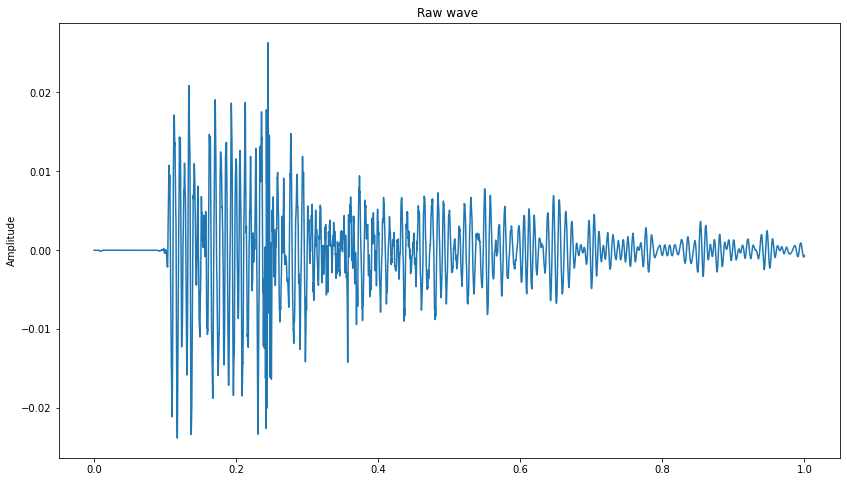

In [ ]:
plot_time_series(load_audio_file('/content/train/audio/records/activate/activate (2).wav'))

In [ ]:
def AddingNoise(dest, sr, data):
  '''
  Adding random noise to audio files
  '''
  wn = np.random.randn(len(data))
  data_wn = data + 0.005*wn
  write(dest, sr, data_wn)

In [ ]:
def SoundShift(dest, sr, data):
  '''
  Shifting the amplitude values
  '''
  data_roll = np.roll(data, 800)
  # plot_time_series(data_roll)
  # ipd.Audio(data_roll, rate=sr)
  write(dest, sr, data_roll)

In [ ]:
def SoundStretch(data, dest, sr, rate=1):
  '''
  For stretching the audio clips
  '''
    input_length = sr
    data = librosa.effects.time_stretch(data, rate)
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    write(dest, sr, data)

In [ ]:
#Collecting unique labels from the dataset and counting number of files belonging to each class
train_audio_path = 'train/audio/records'
labels=os.listdir(train_audio_path)
print(labels)

no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))

['save', 'right', 'quotes', 'less', 'goto', 'iostream', 'std', 'down', 'misty', 'pair', 'tab', 'first', 'compile', 'make', 'break', 'run', 'move', 'include', '0', 'activate', 'slash', 'modulo', 'backslash', 'left', 'divide', '9', '8', 'unsigned', 'deactivate', 'set', 'else', 'escape', 'null', 'if', 'equal to', 'unordered_set', 'open', '4', 'up', '6', 'unknown', 'map', 'char', '5', 'vector', '2', 'bits slash std c plus plus dot h', 'delete', 'main', 'short', '7', 'while', 'add', 'double', 'plus', 'false', 'true', 'or', 'string', 'underscore', 'bitwise', 'second', 'npos', 'define', 'new', 'using', 'do', 'switch', 'long', 'typedef', 'remove', 'and', 'sizeof', 'not', 'unordered_map', 'character', 'bool', 'read', 'line', 'off', 'shift', 'float', 'hey', 'unordered', 'iterator', 'newline', 'continue', 'position', '3', 'void', 'column', '1', 'namespace', 'greater', 'for', 'int', 'xor']


In [ ]:
from pathlib import Path
import random

def DeleteFiles(directory, num, extension='wav'):
  '''
  For deleting random files from a directory
  '''
    files = Path(directory).glob(f'*.{extension}')
    for file in random.sample(list(files), num):
        file.unlink()

In [ ]:
#If number of files in any directory are more than 200 they are deleted randomly so that the model is not bias towards any toke particularly
count=0
for label in labels:
  fcount = no_of_recordings[count]
  if fcount > 200:
    DeleteFiles(train_audio_path + '/'+ label, fcount-200, 'wav')
  count+=1


In [ ]:
def AudioAugmentation(dest, sr, data):
  '''
  Combines previously defined 3 functions for augmentation and genrated about 200 files for each directory in a single go
  '''
  for i in range(40, 100, 4):
    dest2 = dest + '/' + str(time.time()) + '.wav'
    # print(dest)
    rate = random.random()
    rate = round(rate,2) + 0.04
    # print(rate)
    SoundStretch(data, dest2, sr, rate)
  for _ in range(1, 16):    
    dest2 = dest + '/' + str(time.time()) + '.wav'
    AddingNoise(dest2, sr, data)
  for i in range (600, 1200, 40):
    dest2 = dest + '/' + str(time.time()) + '.wav'
    SoundShift(dest2, sr, data)

In [ ]:
#Audio files with labels whose count is less than 200 are augmented
import time
count=0
for label in labels:
  fcount = no_of_recordings[count]
  if fcount < 200:
    for f in os.listdir(train_audio_path + '/'+ label):
      dest = train_audio_path + '/'+ label
      # print(dest+'/'+f)
      data = load_audio_file(dest + '/' + f)
      AudioAugmentation(dest, 8000, data)
  count+=1

#Data Split and Input Preparation

Splitting the dataset and preparing it for giving it as an input to our model

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
#Storing all audio clips in a single list 
train_audios = []
train_labels = []
for label in labels:
    # print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples = load_audio_file(train_audio_path + '/' + label + '/' + wav, )
        if(len(samples)== 8000) : 
            train_audios.append(samples)
            train_labels.append(label)

In [ ]:
#Encoding all labels into one hot vector
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(train_labels)
classes= list(le.classes_)

In [ ]:
y=to_categorical(y, num_classes=len(labels))

In [ ]:
print(len(labels))

97


In [ ]:
train_audios = np.array(train_audios).reshape(-1,8000,1)

In [ ]:
#Splitting into 80 and 20 for training and validation respectively
X_train, X_val, Y_train, Y_val = train_test_split(np.array(train_audios),np.array(y),stratify=y,test_size = 0.20,random_state=777,shuffle=True)

#Creating model and analysing the results

Model consists of **4 Convolutional blocks** followed by a **Flatten layer and then a Dense layer** before the output layer.

Convolutional block consists of a **Conv1D layer followed by BatchNormalization and Max Pooling of obtained weights** and then **Dropout** for avoiding overfitting.



In [ ]:
model = Sequential([
                    Input(shape=(8000,1)),
                    Conv1D(16, 13, 1, padding='valid', activation='relu'),
                    BatchNormalization(),
                    MaxPooling1D(3),
                    Dropout(0.3),

                    Conv1D(32, 11, 1, padding='valid', activation='relu'),
                    BatchNormalization(),
                    MaxPooling1D(3),
                    Dropout(0.5),

                    Conv1D(64, 9, 1, padding='valid', activation='relu'),
                    BatchNormalization(),
                    MaxPooling1D(3),
                    Dropout(0.6),

                    Conv1D(128, 7, 1, padding='valid', activation='relu'),
                    BatchNormalization(),
                    MaxPooling1D(3),
                    Dropout(0.6),

                    Conv1D(256, 7, 1, padding='valid', activation='relu'),
                    BatchNormalization(),
                    MaxPooling1D(3),
                    Dropout(0.6),

                    Flatten(),

                    Dense(256, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.4),

                    Dense(len(labels), activation='softmax')
                  ])


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 7988, 16)          224       
_________________________________________________________________
batch_normalization_18 (Batc (None, 7988, 16)          64        
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 2662, 16)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 2662, 16)          0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 2652, 32)          5664      
_________________________________________________________________
batch_normalization_19 (Batc (None, 2652, 32)          128       
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 884, 32)          

In [ ]:
#Callback for stopping the training when validation accuracy hits 0.7
class myCallback(tf.keras.callbacks.Callback): 
  def on_epoch_end(self, epoch, logs={}): 
    if(logs.get('val_accuracy') > 0.7):   
      self.model.stop_training = True

In [ ]:
#Creating instance of mycallback class
EarlyStopping = myCallback()

In [ ]:
#Stores model weights at the end of every epoch
CheckPoint = ModelCheckpoint(filepath = '/content/drive/MyDrive/records/model.epoch{epoch:02d}-acc{val_accuracy:.2f}.h5', monitor='val_accuracy', verbose=1, mode='max')


In [ ]:
#Fitting the model on dataset
history=model.fit(X_train, Y_train ,epochs=100, callbacks=[EarlyStopping, CheckPoint], batch_size=32, validation_data=(X_val,Y_val), verbose=1)

Epoch 1/100
427/427 [==============================] - 11s 23ms/step - loss: 5.1742 - accuracy: 0.0142 - val_loss: 4.9050 - val_accuracy: 0.0120

Epoch 00001: saving model to /content/drive/MyDrive/records/model.epoch01-acc0.01.h5
Epoch 2/100
427/427 [==============================] - 9s 21ms/step - loss: 4.7735 - accuracy: 0.0189 - val_loss: 4.6034 - val_accuracy: 0.0164

Epoch 00002: saving model to /content/drive/MyDrive/records/model.epoch02-acc0.02.h5
Epoch 3/100
427/427 [==============================] - 9s 22ms/step - loss: 4.6397 - accuracy: 0.0256 - val_loss: 4.5055 - val_accuracy: 0.0182

Epoch 00003: saving model to /content/drive/MyDrive/records/model.epoch03-acc0.02.h5
Epoch 4/100
427/427 [==============================] - 9s 21ms/step - loss: 4.4914 - accuracy: 0.0378 - val_loss: 4.4680 - val_accuracy: 0.0408

Epoch 00004: saving model to /content/drive/MyDrive/records/model.epoch04-acc0.04.h5
Epoch 5/100
427/427 [==============================] - 9s 22ms/step - loss: 4.3

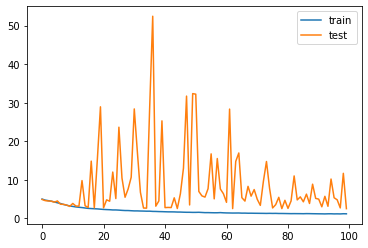

In [ ]:
#Plotting epochs vs losses on training and validation set
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

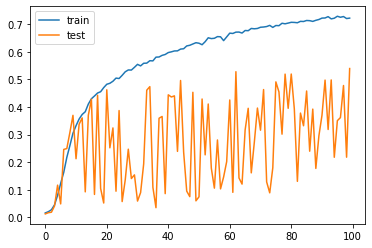

In [ ]:
#Plotting epochs vs accuracy on both training and validation sets
from matplotlib import pyplot 
pyplot.plot(history.history['accuracy'], label='train') 
pyplot.plot(history.history['val_accuracy'], label='test') 
pyplot.legend()
pyplot.show()

#Results

From the performance of model on the training set no one would say that model overfits but the noise in the epochs vs loss and epochs vs accuracy graphs over validation sets suggest the **model is clearly overfitting**. The model architecture couldn't be blamed for it because the architecture is decent however the **deficiency of data** has lead us to this result